In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt

In [2]:
def read_csv() -> DataFrame:
    return pd.read_csv('chicago_taxi_trips_2016_12.csv',
                       parse_dates=True,
                       infer_datetime_format=True)

In [3]:
def get_mode_stats(df):
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(
            {
                'col': column,
                'first_mode': frequencies.index[0],
                'fm_freq': frequencies[0],
                'fm_perc': (frequencies[0] / len(df)) * 100,
                'second_mode': frequencies.index[1],
                'sm_freq': frequencies[1],
                'sm_perc': (frequencies[1] / len(df)) * 100
            })
    return res

In [4]:
def main() -> None:
    df: DataFrame = read_csv()

    numerics_df: DataFrame = df.select_dtypes(include='number')
    categoricals_df: DataFrame = df.select_dtypes(exclude='number')

    numerics_stats: DataFrame = pd.DataFrame(
        numerics_df.describe(include='all'))
    categoricals_stats: DataFrame = pd.DataFrame(
        categoricals_df.describe(include='all'))

    numerics = {
        'val_num': len(numerics_df),
        'missing_values_perc': 100-(numerics_stats.loc['count']/len(numerics_df))*100,
        'cardinality': numerics_df.nunique(),
        'min_val': numerics_stats.loc['min'],
        'max_val': numerics_stats.loc['max'],
        'first_quartile': numerics_stats.loc['25%'],
        'third_quartile': numerics_stats.loc['75%'],
        'average': numerics_stats.loc['mean'],
        'median': numerics_stats.loc['50%'],
        'st_dev': numerics_stats.loc['std']
    }

    categoricals = {
        'val_num': len(categoricals_df),
        'missing_values_perc': 100-(categoricals_stats.loc['count']/len(categoricals_df))*100,
        'cardinality': categoricals_df.nunique(),
        'modes': get_mode_stats(categoricals_df)
    }
    
    numerics['missing_values_perc'].plot(kind='hist', title='percentage of missing values')
    plt.show()
    numerics['cardinality'].plot(kind='hist', title='cardinality')
    plt.show()

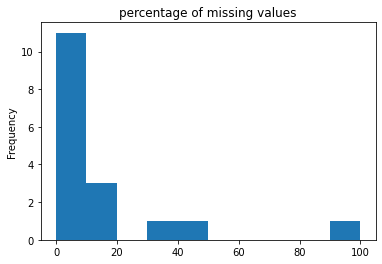

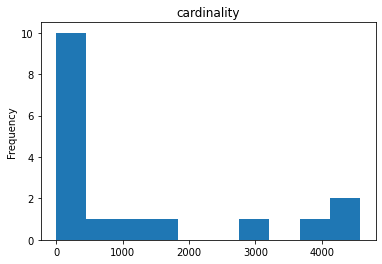

In [5]:
if (__name__ == '__main__'):
    main()